In [26]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#Import CSV Files
apr_20_path = "202004-niceride-tripdata.csv"
may_20_path = "202005-niceride-tripdata.csv"
jun_20_path = "202006-niceride-tripdata.csv"
jul_20_path = "202007-niceride-tripdata.csv"
aug_20_path = "202008-niceride-tripdata.csv"
sep_20_path = "202009-niceride-tripdata.csv"
oct_20_path = "202010-niceride-tripdata.csv"
nov_20_path = "202011-niceride-tripdata.csv"

In [37]:
#Read data to df
apr_2020 = pd.read_csv(apr_20_path, dtype=str)
apr_2020

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,37276F98FD2F1372,docked_bike,2020-04-29 17:41:02,2020-04-29 18:20:55,Lake Street & West River Parkway,149,Coldwater Spring,155,44.9485,-93.2062,44.905,-93.1983,member
1,52B4BA53A4AF9262,docked_bike,2020-04-11 19:28:44,2020-04-11 19:47:35,Portland Ave & Washington Ave,91,Franklin & 28th Ave,47,44.9782,-93.2602,44.9627,-93.2309,casual
2,C836B5042CA2400C,docked_bike,2020-04-18 18:04:00,2020-04-18 18:46:34,30th Ave SE & SE 4th Street,220,30th Ave SE & SE 4th Street,220,44.9714,-93.2134,44.9714,-93.2134,casual
3,84A14A4D0DCB3D58,docked_bike,2020-04-28 22:20:20,2020-04-28 23:06:16,22nd Ave S & Franklin Ave,16,22nd Ave S & Franklin Ave,16,44.9629,-93.241,44.9629,-93.241,casual
4,DD8171CB206BD356,docked_bike,2020-04-26 14:47:36,2020-04-26 15:54:38,Washington & Marquette,30,Washington Ave S & 10th Ave S,48,44.981,-93.2669,44.9765,-93.2552,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13291,D9A22DDD7CBB265B,docked_bike,2020-04-23 17:14:40,2020-04-23 17:28:32,West 15th Street & Willow,94,W Lake of the Isles Pkwy & Kenwood Pkwy,804,44.9682,-93.282,44.9596,-93.3093,member
13292,4397CF60F8B2819A,docked_bike,2020-04-25 14:59:40,2020-04-25 15:55:50,Midtown Exchange,10,MCAD,20,44.9485,-93.2611,44.9572,-93.275,casual
13293,328325F2B50CD963,docked_bike,2020-04-26 13:39:44,2020-04-26 14:14:47,Lake Calhoun Center,90,Lake Calhoun Center,90,44.9485,-93.3173,44.9485,-93.3173,casual
13294,7C73E7D88B557F2C,docked_bike,2020-04-26 13:13:04,2020-04-26 14:26:07,Logan Park,105,Lake Calhoun Center,90,44.9988,-93.2528,44.9485,-93.3173,casual


In [4]:
may_2020 = pd.read_csv(may_20_path, dtype=str)
len(may_2020)

25646

In [5]:
jun_2020 = pd.read_csv(jun_20_path, dtype = str)
len(jun_2020)

36115

In [6]:
jul_2020 = pd.read_csv(jul_20_path, dtype = str)
len(jul_2020)

45929

In [7]:
aug_2020 = pd.read_csv(aug_20_path, dtype=str)
len(aug_2020)

49371

In [8]:
sep_2020 = pd.read_csv(sep_20_path, dtype=str)
len(sep_2020)

37243

In [9]:
oct_2020 = pd.read_csv(oct_20_path, dtype=str)
len(oct_2020)

19377

In [10]:
nov_2020 = pd.read_csv(nov_20_path, dtype=str)
len(nov_2020)

2100

In [11]:
# Append frames
nr_2020 = apr_2020.append(may_2020, ignore_index=True)
nr_2020 = nr_2020.append(jun_2020, ignore_index=True)
nr_2020 = nr_2020.append(jul_2020, ignore_index=True)
nr_2020 = nr_2020.append(aug_2020, ignore_index=True)
nr_2020 = nr_2020.append(sep_2020, ignore_index=True)
nr_2020 = nr_2020.append(oct_2020, ignore_index=True)
nr_2020 = nr_2020.append(nov_2020, ignore_index=True)
len(nr_2020)

229077

In [12]:
nr_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,37276F98FD2F1372,docked_bike,2020-04-29 17:41:02,2020-04-29 18:20:55,Lake Street & West River Parkway,149,Coldwater Spring,155,44.9485,-93.2062,44.905,-93.1983,member
1,52B4BA53A4AF9262,docked_bike,2020-04-11 19:28:44,2020-04-11 19:47:35,Portland Ave & Washington Ave,91,Franklin & 28th Ave,47,44.9782,-93.2602,44.9627,-93.2309,casual
2,C836B5042CA2400C,docked_bike,2020-04-18 18:04:00,2020-04-18 18:46:34,30th Ave SE & SE 4th Street,220,30th Ave SE & SE 4th Street,220,44.9714,-93.2134,44.9714,-93.2134,casual
3,84A14A4D0DCB3D58,docked_bike,2020-04-28 22:20:20,2020-04-28 23:06:16,22nd Ave S & Franklin Ave,16,22nd Ave S & Franklin Ave,16,44.9629,-93.241,44.9629,-93.241,casual
4,DD8171CB206BD356,docked_bike,2020-04-26 14:47:36,2020-04-26 15:54:38,Washington & Marquette,30,Washington Ave S & 10th Ave S,48,44.981,-93.2669,44.9765,-93.2552,casual


In [13]:
# Fix dtypes - datetime
nr_2020["started_at"] = pd.to_datetime(nr_2020["started_at"])
nr_2020["ended_at"] = pd.to_datetime(nr_2020["ended_at"])

In [14]:
# Fix dtypes - coordinates
nr_2020["start_lat"] = nr_2020["start_lat"].astype(float)
nr_2020["start_lng"] = nr_2020["start_lng"].astype(float)
nr_2020["end_lat"] = nr_2020["end_lat"].astype(float)
nr_2020["end_lng"] = nr_2020["end_lng"].astype(float)

In [15]:
nr_2020["rideable_type"] = nr_2020["rideable_type"].convert_dtypes()
nr_2020["start_station_name"] = nr_2020["start_station_name"].convert_dtypes()
nr_2020["start_station_id"] = nr_2020["start_station_id"].convert_dtypes()
nr_2020["end_station_name"] = nr_2020["end_station_name"].convert_dtypes()
nr_2020["end_station_id"] = nr_2020["end_station_id"].convert_dtypes()
nr_2020["member_casual"] = nr_2020["member_casual"].convert_dtypes()

In [16]:
nr_2020 = nr_2020.drop(columns=["ride_id"])

In [18]:
nr_2020["member_casual"]=nr_2020["member_casual"].str.replace("casual", "Casual")
nr_2020["member_casual"]=nr_2020['member_casual'].str.replace("member", "Member")
nr_2020.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,docked_bike,2020-04-29 17:41:02,2020-04-29 18:20:55,Lake Street & West River Parkway,149,Coldwater Spring,155,44.9485,-93.2062,44.9050,-93.1983,Member
1,docked_bike,2020-04-11 19:28:44,2020-04-11 19:47:35,Portland Ave & Washington Ave,91,Franklin & 28th Ave,47,44.9782,-93.2602,44.9627,-93.2309,Casual
2,docked_bike,2020-04-18 18:04:00,2020-04-18 18:46:34,30th Ave SE & SE 4th Street,220,30th Ave SE & SE 4th Street,220,44.9714,-93.2134,44.9714,-93.2134,Casual
3,docked_bike,2020-04-28 22:20:20,2020-04-28 23:06:16,22nd Ave S & Franklin Ave,16,22nd Ave S & Franklin Ave,16,44.9629,-93.2410,44.9629,-93.2410,Casual
4,docked_bike,2020-04-26 14:47:36,2020-04-26 15:54:38,Washington & Marquette,30,Washington Ave S & 10th Ave S,48,44.9810,-93.2669,44.9765,-93.2552,Casual


In [19]:
nr_2020.rename(columns={"started_at" : "start_datetime", 
                        "start_station_name" : "start_station_name", 
                        "start_station_id" : "start_station_id",
                        "ended_at" : "end_datetime",
                        "end_station_name" : "end_station_name",
                        "end_station_id" : "end_station_id",
                        "member_casual" : "account_type",
                        "start_lat" : "start_station_lat",
                        "start_lng" : "start_station_lng",
                        "end_lat" : "end_station_lat",
                        "end_lng" : "end_station_lng",
                        "rideable_type" : "bike_type"}, 
              inplace=True)

In [20]:
# Export combined .csv
nr_2020.to_csv(path_or_buf="../Resources/Nice_ride_trip_history_2020_season.csv", index=False)

In [ ]:
# # Create dataframe with all dockless bike info
# docked2020_df = nr_2020.loc[pd.notna(nr_2020["start_station_name"])]
# docked2020_df = docked2020_df.loc[pd.notna(docked2020_df["end_station_name"])]
# docked2020_df

In [ ]:
# # Create dataframe with all stationed bike info
# docked2020_df = nr_2020.dropna(axis=0)
# docked2020_df

In [ ]:
# electric_df = nr_2020.loc[nr_2020["bike_type"] != "docked_bike"]
# electric_df

In [ ]:
# electric_df["bike_type"].value_counts()

In [ ]:
# START STEPH SECTION - LINE CHART

In [49]:
nr_2020.head()

,bike_type,start_datetime,end_datetime,start_station_name,start_station_id,end_station_name,end_station_id,start_station_lat,start_station_lng,end_station_lat,end_station_lng,account_type
0,docked_bike,2020-04-01 13:47:57,2020-04-01 13:48:29,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual
1,docked_bike,2020-04-01 13:48:56,2020-04-01 13:49:20,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual
2,docked_bike,2020-04-01 13:49:36,2020-04-01 13:49:41,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual
3,docked_bike,2020-04-01 13:52:59,2020-04-01 13:53:02,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual
4,docked_bike,2020-04-01 13:53:21,2020-04-01 13:53:33,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual


In [52]:
# re-sort by datetime
nr_2020.sort_values(by=["start_datetime"], inplace=True, ignore_index=True)
nr_2020

,bike_type,start_datetime,end_datetime,start_station_name,start_station_id,end_station_name,end_station_id,start_station_lat,start_station_lng,end_station_lat,end_station_lng,account_type
0,docked_bike,2020-04-01 13:47:57,2020-04-01 13:48:29,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.983200,-93.223700,44.983200,-93.223700,Casual
1,docked_bike,2020-04-01 13:48:56,2020-04-01 13:49:20,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.983200,-93.223700,44.983200,-93.223700,Casual
2,docked_bike,2020-04-01 13:49:36,2020-04-01 13:49:41,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.983200,-93.223700,44.983200,-93.223700,Casual
3,docked_bike,2020-04-01 13:52:59,2020-04-01 13:53:02,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.983200,-93.223700,44.983200,-93.223700,Casual
4,docked_bike,2020-04-01 13:53:21,2020-04-01 13:53:33,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.983200,-93.223700,44.983200,-93.223700,Casual
...,...,...,...,...,...,...,...,...,...,...,...,...
229072,electric_bike,2020-11-04 21:53:05,2020-11-04 22:57:54,22nd Ave S & Franklin Ave,16,22nd Ave S & Franklin Ave,16,44.962964,-93.241028,44.962909,-93.241065,Casual
229073,electric_bike,2020-11-04 21:58:46,2020-11-04 22:05:59,<NA>,<NA>,Midtown Exchange,10,44.970000,-93.270000,44.948456,-93.260955,Casual
229074,electric_bike,2020-11-04 22:00:22,2020-11-04 22:05:32,Marquette Ave & S 1st St,<NA>,SE 4th Street & SE 3rd Ave,223,44.980000,-93.270000,44.986531,-93.250708,Casual
229075,electric_bike,2020-11-04 22:00:45,2020-11-04 22:04:56,NE Broadway St & NE 5th St,<NA>,<NA>,<NA>,45.000000,-93.260000,45.010000,-93.250000,Casual


In [60]:
# Split datetime column into two values
nr_2020["month"] = nr_2020.start_datetime.dt.month
nr_2020["day"] = nr_2020.start_datetime.dt.day
nr_2020.head()

,bike_type,start_datetime,end_datetime,start_station_name,start_station_id,end_station_name,end_station_id,start_station_lat,start_station_lng,end_station_lat,end_station_lng,account_type,month,day
0,docked_bike,2020-04-01 13:47:57,2020-04-01 13:48:29,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1
1,docked_bike,2020-04-01 13:48:56,2020-04-01 13:49:20,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1
2,docked_bike,2020-04-01 13:49:36,2020-04-01 13:49:41,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1
3,docked_bike,2020-04-01 13:52:59,2020-04-01 13:53:02,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1
4,docked_bike,2020-04-01 13:53:21,2020-04-01 13:53:33,NRM Bike Shop 2,609,NRM Bike Shop 2,609,44.9832,-93.2237,44.9832,-93.2237,Casual,4,1


In [66]:
# Calculate total number of rides per day
per_day_rides = nr_2020.groupby([nr_2020.month, nr_2020.day]).count()
per_day_rides = pd.DataFrame(per_day_rides)
per_day_rides

bike_type  start_datetime  end_datetime  start_station_name  \
month day                                                                
4     1          303             303           303                 303   
      2          194             194           194                 194   
      3          215             215           215                 215   
      4          278             278           278                 278   
      6          126             126           126                 126   
...              ...             ...           ...                 ...   
10    31         427             427           427                 329   
11    1          270             270           270                 210   
      2          417             417           417                 309   
      3          762             762           762                 605   
      4          651             651           651                 481   

           start_station_id  end_station_name  end_station_id  \
month day                                                       
4     1                 303               303             303   
      2                 194               194             194   
      3                 215               215             215   
      4                 278               278             278   
      6                 126               126             126   
...                     ...               ...             ...   
10    31                265               323             260   
11    1                 164               193             159   
      2                 257               295             235   
      3                 514               591             513   
      4                 397               457             388   

           start_station_lat  start_station_lng  end_station_lat  \
month day                                                          
4     1                  303                303              303   
      2                  194                194              194   
      3                  215                215              215   
      4                  278                278              278   
      6                  126                126              126   
...                      ...                ...              ...   
10    31                 427                427              425   
11    1                  270                270              269   
      2                  417                417              416   
      3                  762                762              762   
      4                  651                651              648   

           end_station_lng  account_type  
month day                                 
4     1                303           303  
      2                194           194  
      3                215           215  
      4                278           278  
      6                126           126  
...                    ...           ...  
10    31               425           427  
11    1                269           270  
      2                416           417  
      3                762           762  
      4                648           651  

[216 rows x 12 columns]

In [84]:
# Get rides for April to start with
apr_rides=per_day_rides.loc[4]
apr_rides

,bike_type,start_datetime,end_datetime,start_station_name,start_station_id,end_station_name,end_station_id,start_station_lat,start_station_lng,end_station_lat,end_station_lng,account_type
day,,,,,,,,,,,,
1,303,303,303,303,303,303,303,303,303,303,303,303
2,194,194,194,194,194,194,194,194,194,194,194,194
3,215,215,215,215,215,215,215,215,215,215,215,215
4,278,278,278,278,278,278,278,278,278,278,278,278
6,126,126,126,126,126,126,126,126,126,126,126,126
7,401,401,401,401,401,401,401,401,401,401,401,401
8,231,231,231,231,231,231,231,231,231,231,231,231
9,82,82,82,82,82,82,82,82,82,82,82,82
10,333,333,333,333,333,333,333,333,333,333,333,333


In [87]:
#Define parameters for plot
x_axis = np.arange(1,31,1)
len(x_axis)

30

In [88]:
daily_rides = list(apr_rides.bike_type)
len(daily_rides)

29

In [89]:
# Problem : there is no ride data for 4/5/2020 
# Current Solution : add a zero so that we can make a plot
daily_rides.insert(4, int(0))
daily_rides

[303,
 194,
 215,
 278,
 0,
 126,
 401,
 231,
 82,
 333,
 767,
 28,
 55,
 68,
 103,
 243,
 319,
 911,
 593,
 268,
 294,
 920,
 526,
 665,
 1359,
 1048,
 1071,
 220,
 663,
 1012]

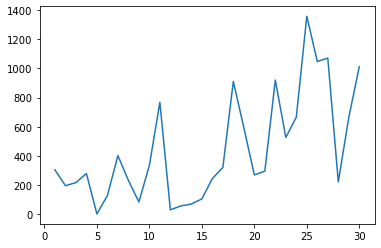

In [90]:
# Draw plot
plt.plot(x_axis, daily_rides)

In [ ]:
# END STEPH SECTION - LINE CHART